In [1]:
!pip install scrapeddit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.0 MB/s eta 0:00:00


In [2]:
from scrapeddit import authentication

In [3]:
authentication.auth_reddit(client_id = "uRyb_TFqvN7MbTU0cntBug",
                    client_secret = "VAF_xUr-Q6h1JoZG-M8WE2RnLG8XlA",
                    username = 'boyboyboi3',
                    password = 'redditpassword03',
                    redirect_uri = "http://localhost:8080",
                    user_agent = "script by u/boyboyboi3",
                    check_for_async=False
)

Authentication was successful, auth stack: 1


In [4]:
from scrapeddit import scrapeonce

In [5]:
scrape_df = scrapeonce.scrape_reddit('spotted', limit = 50)

100%|██████████| 50/50 [00:25<00:00,  1.99it/s]


In [6]:
scrape_df[:10]

,id,title,num_comments,score,upvote_ratio,date,domain,nsfw,image,author
0,15hm7ad,[F40] spotted while at work,744,40162,0.95,2023-08-04 01:22:20,i.redd.it,False,https://preview.redd.it/tgf3hkimwzfb1.jpg?auto...,Straight_Midnight559
1,15hr50f,[Unknown],448,16449,0.97,2023-08-04 05:31:46,i.redd.it,False,https://preview.redd.it/rk79ss0551gb1.jpg?auto...,GurTraditional1162
2,15hw1b6,[Ford RS200] Took a weird way home and was gif...,169,10852,0.99,2023-08-04 10:12:08,i.imgur.com,False,https://external-preview.redd.it/SMRKhQusP4_I9...,thisistonysrs
3,15hlf3b,[bugatti veyron super sport (world record edit...,154,8739,0.99,2023-08-04 00:46:21,i.redd.it,False,https://preview.redd.it/y8r129i7qzfb1.jpg?auto...,NateDogg667
4,15hpmxv,[Pagani Zonda AY] Just outside my gym,99,6967,1.00,2023-08-04 04:10:27,i.redd.it,False,https://preview.redd.it/fm9sk6omq0gb1.jpg?auto...,Dry-Captain516
5,161pztt,"My friends neighbor has a [Ford RS200], toured...",197,5629,0.98,2023-08-26 09:01:13,reddit.com,False,None,Olive_0r
6,13m2dvz,I was told this is the [Ferrari Conciso],256,5219,0.97,2023-05-19 17:40:45,i.redd.it,False,https://preview.redd.it/fpdqyzb09v0b1.jpg?auto...,JollyAd363
7,15jyjb2,[multi] I work in a wealthy area.,260,5033,0.99,2023-08-06 19:41:27,reddit.com,False,None,brewu4
8,12en3bm,[Bentley Mulliner Batur] 1 of 18 ever made. £1...,188,4518,0.98,2023-04-07 14:28:15,i.redd.it,False,https://preview.redd.it/7opbpdodkisa1.jpg?auto...,TheSaviour1
9,140s051,Just found out my neighbor has a [Mclaren Spee...,204,4317,0.97,2023-06-04 22:02:05,reddit.com,False,None,tattedfishboy


Displaying 24 images in total
23 post did not have images, or failed to fetch


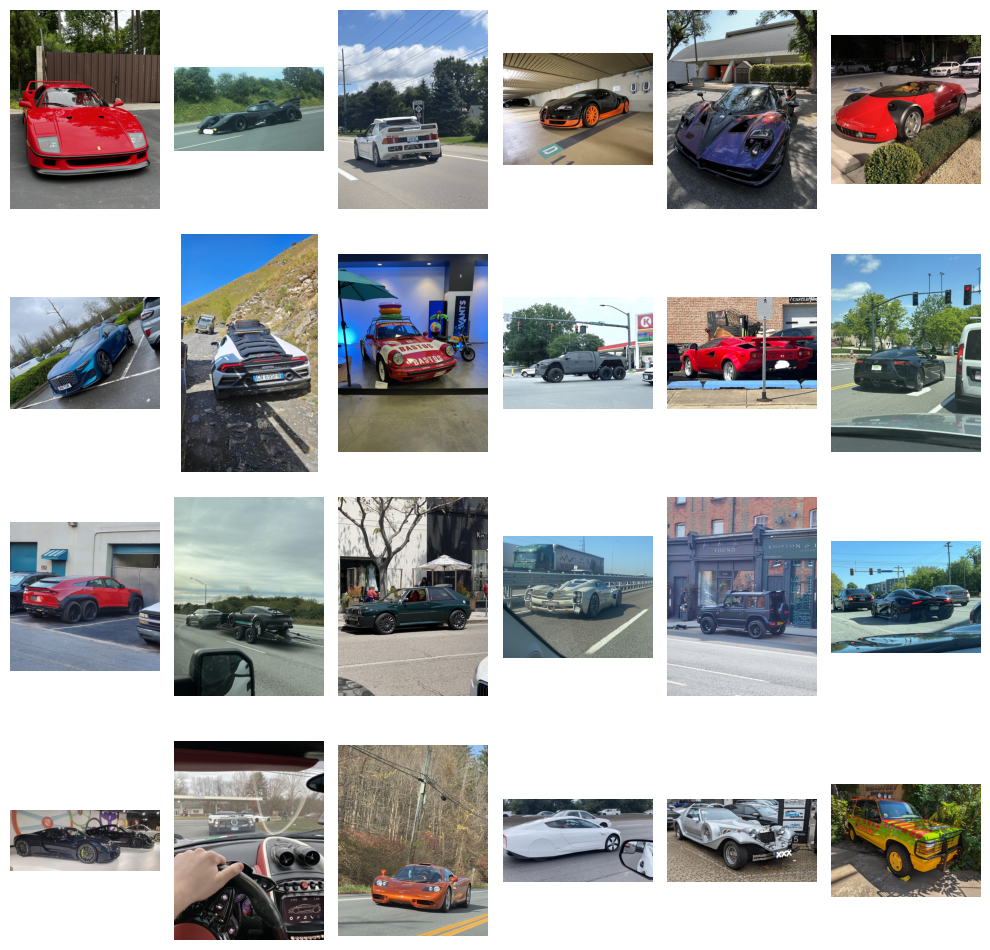

In [7]:
from scrapeddit import showit

showit.show_images(list(scrape_df.image), figsize = (10,10), max_images = 24)

In [8]:
from scrapeddit import redditdl
from scrapeddit.redditdl import ScrapeditDataset
from scrapeddit.transforms import ResizeWithPadding
import torchvision.transforms as transforms

size = 300
transform_resize=transforms.Compose([
                              ResizeWithPadding(size=size),
                              transforms.Resize((size,size)),
                              transforms.ToTensor()
                              ])

subreddits = ['Pizza', 'burgers']
dataset = ScrapeditDataset(subreddit=subreddits, limit = 200, transform = transform_resize, max_size = 100, show_safe = True)

100%|██████████| 200/200 [00:43<00:00,  4.56it/s]


200it [00:14, 14.13it/s]
200it [00:20,  9.87it/s]


Out of 400, 250 were able to scrape


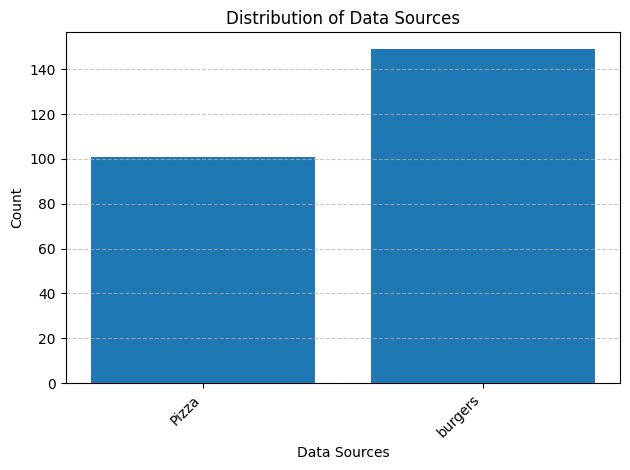

In [9]:
dataset()

In [10]:
import torch
from torch.utils.data import DataLoader

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

bs = 50
train_dataloader = DataLoader(train_dataset, batch_size = bs, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size = bs, shuffle=True)

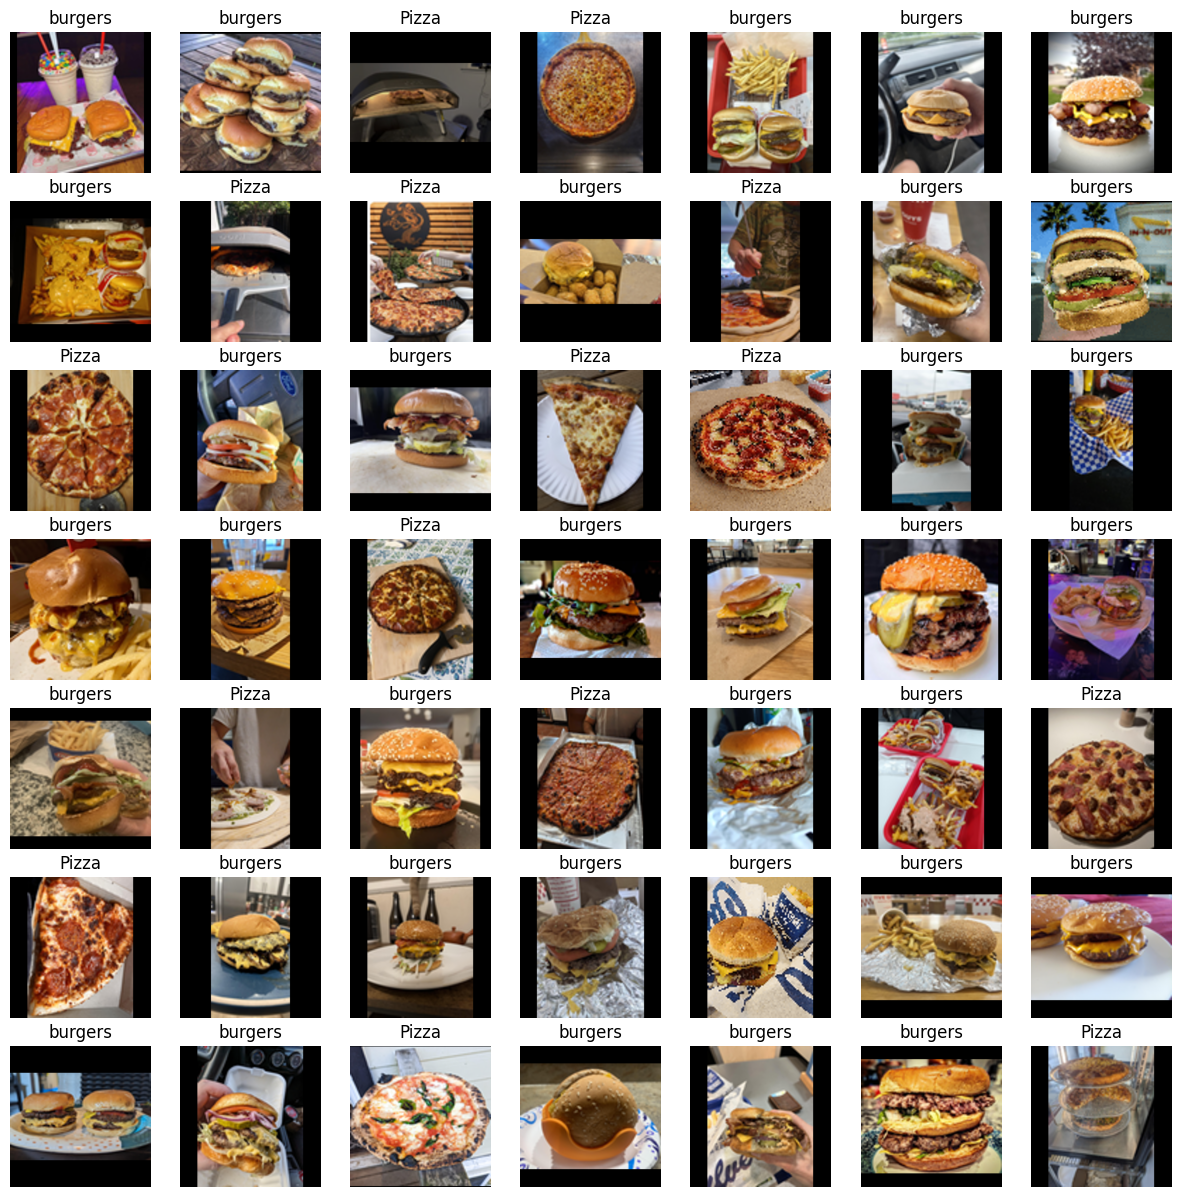

In [13]:
sample_batch = next(iter(train_dataloader))
from scrapeddit.showit import show_batch

show_batch(sample_batch = sample_batch, max = 100, figsize = (15,15))